<a href="https://colab.research.google.com/github/navillanueva/uc3m-neural-networks-2021-p2/blob/main/ScryptP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 150)               2850      
                                                                 
 dense_11 (Dense)            (None, 4)                 604       
                                                                 
Total params: 3,454
Trainable params: 3,454
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
451/451 [==============================] - 1s 2ms/step - loss: 0.2526 - accuracy: 0.2306 - mse: 0.2526 - val_loss: 0.1970 - val_accuracy: 0.2478 - val_mse: 0.1970
Epoch 2/400
451/451 [==============================] - 1s 2ms/step - loss: 0.2295 - accuracy: 0.2350 - mse: 0.2295 - val_loss: 0.1762 - val_accuracy: 0.4159 - val_mse: 0.1762
Epoch 3/400
451/451 [==============================] - 1s 2ms/step - loss: 0.2120 - accuracy: 0.32

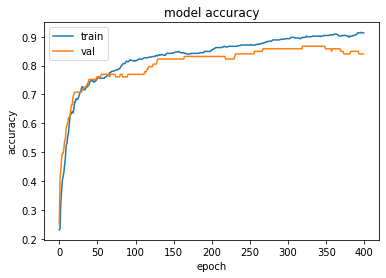

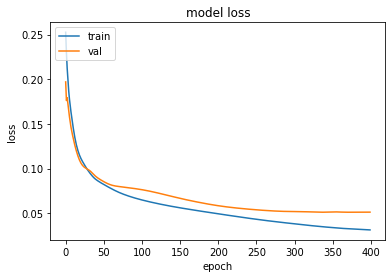

"\n# Construir y entrenar el modelo definitivo\n# ejemplo:\nnum_neuronas=150\nlr = 0.5\nepochs = 400\n#definir modelo\nfinal_model = Sequential()\nfinal_model.add(Dense(num_neuronas, input_shape=input_shape, activation='sigmoid'))\nfinal_model.add(Dense(num_clases, activation='softmax'))\n\n# CONFIGURAR MODELO Y ENTRENAMIENTO (TRAINING 100%)\nfinal_model.compile(loss='mean_squared_error',\noptimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=0),\nmetrics=['accuracy', 'mse'] )\nhistory_final_model = final_model.fit(X_train, y_train_transformed, epochs=epochs,\nbatch_size=1, verbose=1, validation_split=0, shuffle=False)\n\n# EVALUAR MODELO DEFINITIVO\ntest_results = final_model.evaluate(X_test, y_test_transformed, verbose=1)\nprint(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}')\n\n# predicciones en bruto\nraw_testPred = final_model.predict(X_test)\n#prediccion de los 5 primeros patrones de test: 5 vectores con valores reales\nprint(raw_testPred[:5])\n\n#

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

'''
#Preparación de los datos

df = pd.read_csv("/content/sample_data/vehicle.dat.txt", header = None, delimiter = ', ', engine= 'python')

norm_df = (df.iloc[:,0:18]-df.iloc[:,0:18].min())/(df.iloc[:,0:18].max()-df.iloc[:,0:18].min())

norm_df.loc[:,18] = df.iloc[:,-1]

train, test = train_test_split(norm_df, test_size = (1/3))

train.to_csv('/content/sample_data/vehicleTrainValid.csv', index=False)
test.to_csv('/content/sample_data/vehicleTest.csv', index=False)
'''


train_set = pd.read_csv('/content/sample_data/vehicleTrainValid.csv', header='infer', delimiter=',')
test_set = pd.read_csv('/content/sample_data/vehicleTest.csv', header='infer', delimiter=',')
# SELECCION DE LA SALIDA
y_train = train_set.iloc[:,-1:]
X_train = train_set.iloc[: , :-1]
y_test = test_set.iloc[:,-1:]
X_test = test_set.iloc[: , :-1]


# CONVERTIR TARGET A CATEGORICAL
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train_transformed = encoder.fit_transform(y_train)
y_test_transformed = encoder.fit_transform(y_test)
#print(y_train[:11])
#print(y_train_transformed[:11])


# COMPROBAR DIMENSIONES DE LOS DATOS
#print(X_train.shape)
#print(y_train.shape)
#print(y_train_transformed.shape)
#print(X_test.shape)
#print(y_test.shape)
#print(y_test_transformed.shape)
#obtener dim de la entrada y número de salidas
input_shape = (X_train.shape [1] ,) # (18, )
num_clases = y_train_transformed.shape [1] # 4
#print(input_shape)
#print(num_clases)


#Definición del modelo
model = Sequential()
model.add(Dense(150, input_shape=input_shape, activation='sigmoid'))
#model.add(Dense(50, input_shape=(50,), activation='sigmoid'))
#model.add(Dense(60, input_shape=(60,), activation='sigmoid'))
#model.add(Dense(60, input_shape=(60,), activation='sigmoid'))
model.add(Dense(num_clases, activation='softmax'))

model.summary()



# CONFIGURAR MODELO Y ENTRENAMIENTO (TRAINING 80%, VALIDACION 20%)
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=0.5, momentum=0), metrics=['accuracy','mse'])
historico = model.fit(X_train, y_train_transformed, epochs=400, batch_size=1, verbose=1, validation_split=0.2, shuffle=False)

## plots de evolución de loss y accuracy
from matplotlib import pyplot as plt
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# GUARDAR RESULTADOS EN FICHEROS
# evolución del entrenamiento (80% train 20% val) en la búsqueda de hiperparámetros
# son los datos que se usan para construir los plots
# En este caso, la variable 'historico' contiene los datos del último entrenamiento realizado
np.savetxt('/content/sample_data/historicoTrainLoss.txt',historico.history['loss'])
np.savetxt('/content/sample_data/historicoValLoss.txt',historico.history['val_loss'])
np.savetxt('/content/sample_data/historicoTrainAcc.txt',historico.history['accuracy'])
np.savetxt('/content/sample_data/historicoValAcc.txt',historico.history['val_accuracy'])

'''
# Construir y entrenar el modelo definitivo
# ejemplo:
num_neuronas=150
lr = 0.5
epochs = 400
#definir modelo
final_model = Sequential()
final_model.add(Dense(num_neuronas, input_shape=input_shape, activation='sigmoid'))
final_model.add(Dense(num_clases, activation='softmax'))

# CONFIGURAR MODELO Y ENTRENAMIENTO (TRAINING 100%)
final_model.compile(loss='mean_squared_error',
optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=0),
metrics=['accuracy', 'mse'] )
history_final_model = final_model.fit(X_train, y_train_transformed, epochs=epochs,
batch_size=1, verbose=1, validation_split=0, shuffle=False)

# EVALUAR MODELO DEFINITIVO
test_results = final_model.evaluate(X_test, y_test_transformed, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}')

# predicciones en bruto
raw_testPred = final_model.predict(X_test)
#prediccion de los 5 primeros patrones de test: 5 vectores con valores reales
print(raw_testPred[:5])

#predicciones de la clase
testPred = np.argmax(raw_testPred, axis=1)
#transformar el núm de col en la etiqueta
class_testPred = encoder.classes_[testPred]
print(testPred[:5])
print(class_testPred[:5])

#Confusion Matrix
cm=confusion_matrix(y_test, class_testPred)
print(cm)

print('Classification Report')
print(classification_report(y_test, class_testPred))

# evaluación del modelo final (loss y accuracy)
np.savetxt('/content/sample_data/evaluacion.txt',test_results,newline='\t')
# guardar matriz de confusión
np.savetxt('/content/sample_data/matrizConf.txt', cm, fmt='%-3d')
#guarda el modelo completo
final_model.save('/content/sample_data/modelo.h5')
#guarda solo pesos
final_model.save_weights('/content/sample_data/pesos.h5')
'''
